# Project Final Report
## Predicting Newsletter Subscription from Player Characteristics 
  
#### **Name:** 
1. Carlos Saliba
2. Simon San
3. Ni Made Chandra Sriwijaya Putri
4. Maxwell Wong

#### **Course:** DSCI 100_004_Group 5  

This project explores whether player characteristics and behaviors can predict whether a player subscribes to the Minecraft research newsletter.

## Introduction

### Background Information

Understanding player behaviour is essential for designing effective communication strategies in online gaming communities. In this project, we analyze data collected from a Minecraft research server developed by a UBC Computer Science research group led by Frank Wood. The server records players’ actions and demographic information, creating opportunities to study how different types of players engage with the game environment.

One challenge faced by the research team is efficiently recruiting and maintaining participants for their studies. One possible indicator of engagement is whether players subscribe to the project’s game-related newsletter. Identifying which player characteristics predict newsletter subscription can help the research team better allocate resources such as server capacity and outreach efforts.

### Questions to be Answered 

#### Broad Question
_What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ across various player types?_

#### Specific Question 
_Can a player's total played hours and age predict whether a player subscribes to the newsletter?_

### Data Description

#### players.csv
- **Number of observations: 196**
- **Number of variables: 7**
- **Description:** Contains player demographic and behavioral information.

| Category | Type | Description|
|----------|------|------------|
|`experience`| Character | Player's experience categorized as Amateur, Beginner, Regular, Veteran, or Pro|
|`subscribe`| Logical | Whether the player is subscribed to a game-related newspaper or not. TRUE = subscribed, FALSE = not subscribed |
|`hashedEmail` | Character | Hashed email of players to identify players between data like `sessions.csv` while protecting privacy |
|`played_hours`| Numeric | Amount of server play time in hours |
|`name`| Character | Name of player |
|`gender`| Character | Gender of player (Male/Female)|
|`Age`| Numeric | Age of player in years |


#### Summary Statistics for Data Description

In [2]:
library(tidyverse)

#preview data
players_url <- "https://raw.githubusercontent.com/NiMadeChandra/Final-Project-DSCI-100-004_Group-5/refs/heads/main/players.csv"
players <- read_csv(players_url)
head(players)

#total observations/players
total_obs <- nrow(players)
total_var <- ncol(players)
paste("Total Observation of Players Data: ", total_obs)
paste("Total Variabel of Players Data: ", total_var)

#Experience summary stats
experience_sum <- players |>
  summarize(
    `Amateur` = sum(experience == "Amateur", na.rm = TRUE),
    `Veteran` = sum(experience == "Veteran", na.rm = TRUE),
    `Regular` = sum(experience == "Regular", na.rm = TRUE),
    `Beginner` = sum(experience == "Beginner", na.rm = TRUE), 
    `Pro` = sum(experience == "Pro", na.rm = TRUE))

#Subscribe summary stats
subscribe_sum <- players |>
  summarize(
    `Subscribe` = sum(subscribe == TRUE, na.rm = TRUE),
    `Not Subscribe` = sum(subscribe == FALSE, na.rm = TRUE),
    `Total Observation` = n(),
    `Percentage of Subscribers` = `Subscribe` / `Total Observation`* 100,
    `Percentage of Non Subscribers` = `Not Subscribe` / `Total Observation` * 100) |>
  round(2)

#played hours summary stats
played_hours_sum <- players |>
  summarize(
    `Minimum` = min(played_hours, na.rm = TRUE),
    `Q1` = quantile(played_hours, 0.25, na.rm = TRUE),
    `Median` = median(played_hours, na.rm = TRUE),
    `Mean` = mean(played_hours, na.rm = TRUE),
    `Q3` = quantile(played_hours, 0.75, na.rm = TRUE),
    `Maximum` = max(played_hours, na.rm = TRUE)
  ) |>
  round(3)

#age summary stats
age_sum <- players |>
  summarize(
    `Minimum` = min(Age, na.rm = TRUE),
    `Q1` = quantile(Age, 0.25, na.rm = TRUE),
    `Median` = median(Age, na.rm = TRUE),
    `Mean` = mean(Age, na.rm = TRUE),
    `Q3` = quantile(Age, 0.75, na.rm = TRUE),
    `Maximum` = max(Age, na.rm = TRUE)
  ) |>
  round(2)

#gender summary stats
gender_sum <- players |>
  mutate(gender = as.factor(gender)) |>
  summarize(
    Female = sum(gender == "Female", na.rm = TRUE),
    Male = sum(gender == "Male", na.rm = TRUE),
    Other = sum(gender == "Other", na.rm = TRUE),
    Total = n()
  ) |>
  mutate(
    `Percentage Female` = Female / Total * 100,
    `Percentage Male` = Male / Total * 100,
    `Percentage Other` = Other / Total * 100
  ) |>
  round(2)

cat("\n Summary of Player Experience\n\n")
list(experience_sum )

cat("Summary of Player Subscription")
list(subscribe_sum)

cat("\n Summary of Played Hours\n")
list(played_hours_sum)

cat("\n Summary of Player Age\n")
list(age_sum)

cat("\n Summary of Player Gender\n")
list(gender_sum)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] "Total Observation of Players Data:  196"

[1] "Total Variabel of Players Data:  7"


 Summary of Player Experience



Amateur,Veteran,Regular,Beginner,Pro
<int>,<int>,<int>,<int>,<int>
63,48,36,35,14


Summary of Player Subscription

Subscribe,Not Subscribe,Total Observation,Percentage of Subscribers,Percentage of Non Subscribers
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
144,52,196,73.47,26.53



 Summary of Played Hours


Minimum,Q1,Median,Mean,Q3,Maximum
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.1,5.846,0.6,223.1



 Summary of Player Age


Minimum,Q1,Median,Mean,Q3,Maximum
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,17,19,21.14,22.75,58



 Summary of Player Gender


Female,Male,Other,Total,Percentage Female,Percentage Male,Percentage Other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37,124,1,196,18.88,63.27,0.51


#### Potential Issues
- The played_hours variable has a median of 0.10 and a maximum of 223.10, indicating a highly skewed distribution. This skewness may affect the performance and stability of our classification model, especially if the model is sensitive to outliers.

- There are two players with missing Age values (NA), which could reduce the model’s accuracy if not handled through imputation or removal.

- There may be participation bias, as shown by the gender imbalance, the high proportion of subscribed players, and the predominance of amateur-level experience. However, since our model uses only `Age` and `played_hours` as predictors and subscription status as the target variable, we only need to consider issues related to these three variables when evaluating model performance.   

## Methods 

To investigate our question, we performed a full data analysis workflow in a Jupyter Notebook. Our methods, supported by the accompanying code, follow the steps described below.

### Data Import and Cleaning
- We began by loading the dataset (players.csv) directly into our notebook.
- After examining its structure, we removed missing or inconsistent values and standardised any variables that required formatting.
- We also confirmed that key variables such as age, hours played, and newsletter subscription status were correctly encoded.

### Exploratory Data Analysis
Next, we summarised and visualised the dataset to understand patterns and distributions. This included:
- Visualisation of the relationship between age and subscription status
- Visualisation of the relationship between hours played and subscription status
- Make a relationship using scatter plot visualisation between age and hours played to determine subscription status

These visualisations helped us identify relationships worth testing further.

### Data Splitting
To build a predictive model, we split the dataset into:
- A training set used to fit our model (75%)
- A test set used to evaluate model performance on unseen data (25%)
This ensured a fair assessment of how well the model generalises.

### Building the Predictive Model
- We used a classification model to predict whether a player subscribes to the newsletter.
- The model used player characteristics as predictors, including player playing time and age
- To ensure reliability, we trained the model using cross-validation to select optimal hyperparameters and prevent overfitting. 
- As part of this process, we also evaluated multiple values of k in the K-Nearest Neighbors (KNN) algorithm and selected the value that produced the highest validation accuracy.

### Model Evaluation
We evaluated model performance using metrics such as:
- Accuracy
- Confusion matrices
- Classification error.
We then used the test set to estimate how accurately the model predicts subscription status for new, unseen players.

## Results

### 1. Clean Data

In [3]:
players_clean <- players |>
  drop_na(Age, played_hours) |>
  select(subscribe, Age, played_hours)
head(players_clean)

subscribe,Age,played_hours
<lgl>,<dbl>,<dbl>
TRUE,9,30.3
TRUE,17,3.8
FALSE,17,0.0
TRUE,21,0.7
TRUE,21,0.1
TRUE,17,0.0


### 2. Exploratory Data Analysis

#### Visualization of the Relationship between Predictor Variables and Subscription Status

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



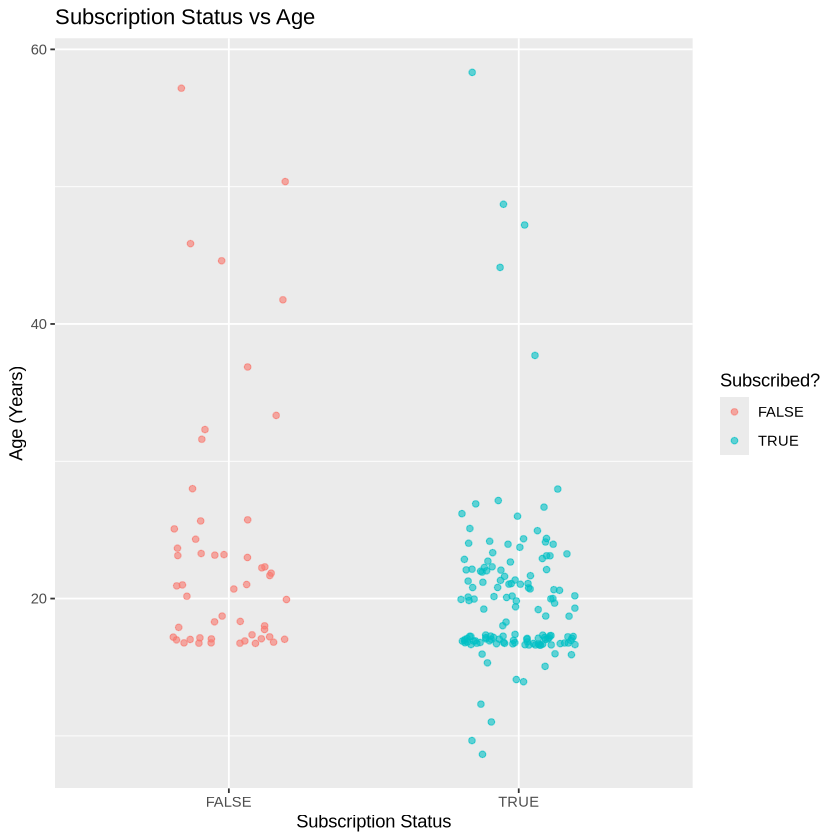

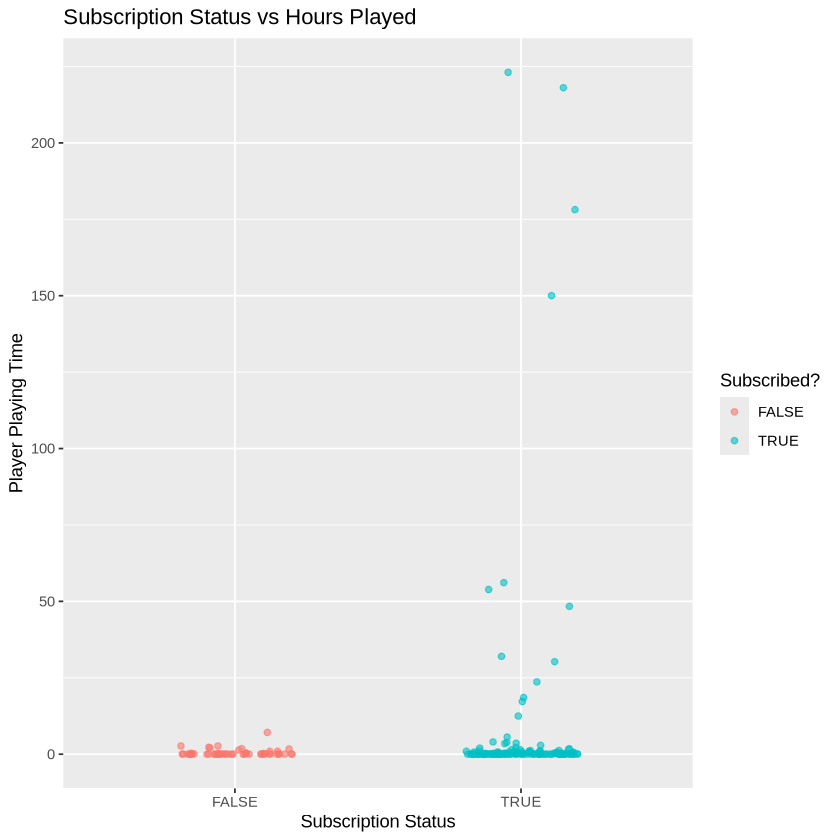

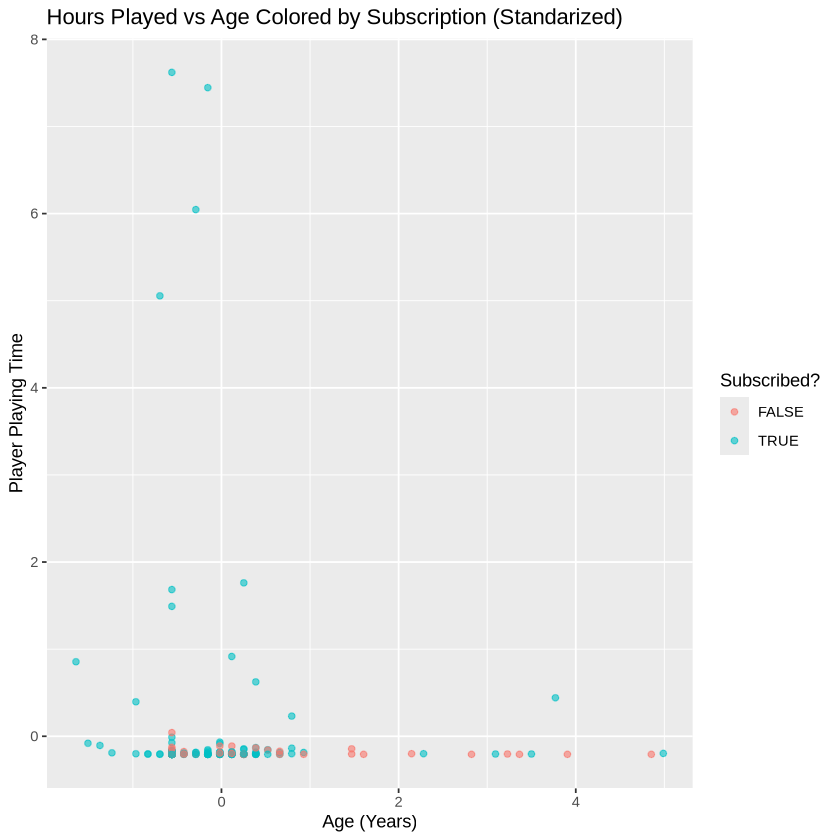

In [4]:
#Subscription Status vs Age
library(tidymodels)
players_clean |>
    ggplot(aes(x = subscribe, y = Age, color = subscribe)) +
        geom_jitter(alpha = 0.6, width = 0.2) +
        labs(x = "Subscription Status", y = "Age (Years)", color = "Subscribed?") +
        ggtitle("Subscription Status vs Age")

#Subscription Status vs Hours Played
players_clean |>
    ggplot(aes(x = subscribe, y = played_hours, color = subscribe)) +
        geom_jitter(alpha = 0.6, width = 0.2) +
        labs(x = "Subscription Status", y = "Player Playing Time", color = "Subscribed?") +
        ggtitle("Subscription Status vs Hours Played")

#Standardized Plot of Hours Played Against Age Coloring by Subscription
players_recipe <- recipe(subscribe ~ ., data = players_clean)

players_recipe <- players_recipe |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()

scaled_players <- bake(players_recipe, players_clean)

standardized_both_plot <- scaled_players |>
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.6) +
  labs(
    x = "Age (Years)",
    y = "Player Playing Time",
    color = "Subscribed?") +
  ggtitle("Hours Played vs Age Colored by Subscription (Standarized)")
standardized_both_plot

To get a bit of an idea of what the data looks like, we plotted hours_played against Age and scaled the y axis as most players played very little.

### 3. Data Splitting

#### Divided the Dataset Into A 75% Training Set and A 25% Test Set to Build A Predictive Model.

In [5]:
set.seed(20)
options(repr.matrix.max.rows = 6)

kvals = tibble(neighbors = seq(from = 1, to = 10, by = 1))

players_clean <- players_clean |>
    mutate(subscribe = as_factor(subscribe))

split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_training <- training(split)
players_testing <- testing(split)
split

<Training/Testing/Total>
<145/49/194>

### 4. Building the Predictive Model

####  Used a KNN Classification Model to Predict Whether A Player Subscribes To The Newsletter. 

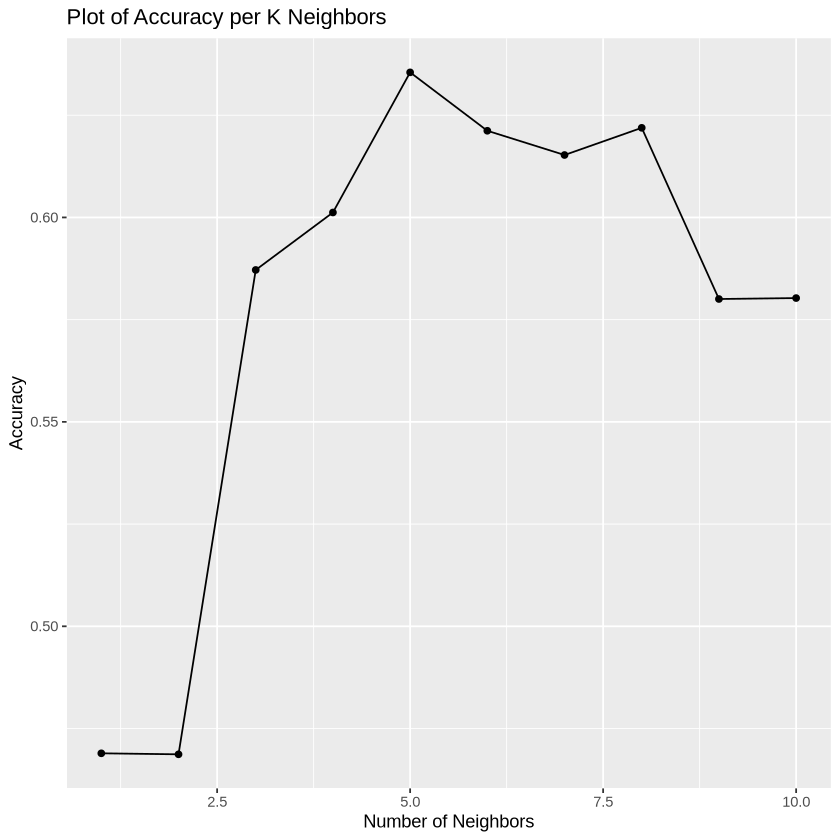

In [6]:
training_recipe <- recipe(subscribe ~ Age + played_hours, data = players_training) |>
    step_impute_mean(all_numeric_predictors()) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

players_fit <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = players_vfold, grid = kvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

k_plot <- players_fit |>
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Number of Neighbors", y = "Accuracy") +
        ggtitle("Plot of Accuracy per K Neighbors")
k_plot

From the plot, the best K in KNN Classification is the one that gives the highest accuracy. 
- Looking at the accuracy values, the best performing K is K = 5 with the highest accuracy: 0.6354844
- K = 5 gives the overall peak in validation accuracy
- After K = 5, performance begins to drop or fluctuate downward

#### Use K = 5 as the Best K 

In [7]:
new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

new_players_fit <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(new_knn_spec) |>
    fit(players_training)
new_players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_impute_mean()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3793103
Best kernel: rectangular
Best k: 5

### 5. Model Evaluation

#### Evaluated Model Performance Using Metrics (Accuracy, Confusion Matrices, and Classification Error)

In [9]:
players_prediction <- predict(new_players_fit, players_testing) |>
    bind_cols(players_testing)

players_prediction |> pull(subscribe) |> levels()

cat("\n \n ACCURACY\n")
accuracy_result <- players_prediction |>
  accuracy(
    truth = subscribe,
    estimate = .pred_class) |>
  rename(
    Metric = .metric,
    Value = .estimate)
accuracy_result

cat("\n \n PRECISION\n")
precision_result <- players_prediction |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "second") |>
  rename(
    Metric = .metric,
    Estimator = .estimator,
    Value = .estimate)
precision_result

cat("\n \n RECALL\n")
recall_result <- players_prediction |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "second") |>
  rename(
    Metric = .metric,
    Estimator = .estimator,
    Value = .estimate)
recall_result

cat("\n \n CONFUSON MATRIX\n")
players_mat <- players_prediction |> 
       conf_mat(truth = subscribe, estimate = .pred_class)
players_mat

[1] "FALSE" "TRUE"


 
 ACCURACY


Metric,.estimator,Value
<chr>,<chr>,<dbl>
accuracy,binary,0.6122449



 
 PRECISION


Metric,Estimator,Value
<chr>,<chr>,<dbl>
precision,binary,0.7428571



 
 RECALL


Metric,Estimator,Value
<chr>,<chr>,<dbl>
recall,binary,0.7222222



 
 CONFUSON MATRIX


          Truth
Prediction FALSE TRUE
     FALSE     4   10
     TRUE      9   26

We evaluated the K-Nearest Neighbors (KNN) classification model using the testing dataset. The key performance metrics are:

- Accuracy: 0.612  
- Precision: 0.743  
- Recall: 0.722  

These results indicate that the model correctly predicts the newsletter subscription status about 61% of the time. The relatively high precision (74.3%) shows that when the model predicts a player will subscribe, it is often correct. The recall value (72.2%) suggests that the model successfully identifies most of the actual subscribers.

|                | Actual: No | Actual: Yes |
|----------------|------------|-------------|
| Predicted: No  | 4          | 10          |
| Predicted: Yes | 9          | 26          |

The confusion matrix shows that:
- The model correctly identified 26 true subscribers (true positives).
- It incorrectly labeled 10 subscribers as non-subscribers (false negatives).
- It correctly recognized 4 non-subscribers (true negatives).
- It incorrectly predicted 9 non-subscribers as subscribers (false positives).

### 6. Discussions

#### Summary of Findings

- Our group initially asked the question: Can a player’s total hours and age accurately predict whether a player subscribes to the newsletter?
- To explore this, we first individually compared each of the two variables to subscription status, before combining them into a single graph comparing hours played on the x-axis and age on the y-axis.
- Exploratory visualisations showed that age did not differ substantially between subscribers and non-subscribers, while players with higher total playtime appeared more likely to subscribe.
- After splitting the data into a 75% training set and a 25% test set, we built a KNN model and found the optimal value of K to be 5.
- After evaluating the KNN model we made, taking into account accuracy, confusion matrices, and classification error, we concluded that our model CAN indeed predict whether or not a player would subscribe to the newsletter as a result of total hours and age, proven through the high rate of success, being a 61% accuracy, 74% precision, and a recall value of 72%, indicating that the model can reasonably identify subscribers based on these two predictors.

#### Comparison with Expectations

- This matched our expectations because the exploratory plots showed a clear separation in total played hours between subscribers and non-subscribers, while the age distributions overlapped substantially.
- Since KNN bases its predictions on similarity in numeric space, we expected playtime to dominate the predictive signal, with age contributing far less.
- This also helps explain why the overall model accuracy remained relatively modest, as relying primarily on a single strong predictor limited the model’s ability to distinguish between subscribers and non-subscribers fully.

#### Impact of Findings
These findings suggest several potential impacts, particularly for marketing and player engagement strategies:
- More effective targeted marketing, as companies can identify players with high engagement (e.g., high playtime) who are more likely to subscribe.
- Reduced spam to uninterested users, since promotions can be directed toward players with higher predicted interest.
- Better personalisation, such as tailoring offers based on playtime or age groups.
- Lower marketing costs, because less mass campaigning is needed when focusing efforts on high-likelihood subscribers.

#### Future Questions
The analysis opens up several directions for future research. One question is whether other variables, such as region, experience level, or gender, could further improve predictive accuracy. Another possibility is examining whether similar models could predict resubscription or unsubscription behaviour over time. Exploring these questions may provide a deeper understanding of how different player characteristics influence long-term engagement with game-related newsletters.